# <span style='color:#FF8383'>Assignment 17</span>
## <span style='color:#6A9C89'> Support Vector Machine (Support Vector Classifier) </span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## notebook settings
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
print('Imported')

Imported


In [2]:
df = pd.read_csv('mushroom.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,cup,smooth,silky,gray,yellow,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,rooted,silky,silky,cinnamon,brown,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,cup,scaly,silky,yellow,gray,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,club,smooth,scaly,yellow,pink,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,missing,fibrous,scaly,gray,white,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   object 
 1   cap_surface               2000 non-null   object 
 2   cap_color                 2000 non-null   object 
 3   bruises                   2000 non-null   object 
 4   odor                      2000 non-null   object 
 5   gill_attachment           2000 non-null   object 
 6   gill_spacing              2000 non-null   object 
 7   gill_size                 2000 non-null   object 
 8   gill_color                2000 non-null   object 
 9   stalk_shape               2000 non-null   object 
 10  stalk_root                2000 non-null   object 
 11  stalk_surface_above_ring  2000 non-null   object 
 12  stalk_surface_below_ring  2000 non-null   object 
 13  stalk_color_above_ring    2000 non-null   object 
 14  stalk_co

In [4]:
rows, columns = df.shape
print(f'Number of Rows = {rows}')
print(f'Number of Columns = {columns}')

Number of Rows = 2000
Number of Columns = 25


In [5]:
df.describe()

,stalk_height,cap_diameter
count,2000.000000,2000.000000
mean,8.449118,12.314345
std,3.697217,7.048845
min,2.000000,1.000000
25%,5.291009,5.723521
50%,8.318596,12.124902
75%,11.781272,18.698605
max,15.095066,25.000054


## <span style='color:#6A9C89'> Exploratory Data Analysis (EDA) </span>

In [6]:
cat_cols = [x for x in df.columns if df[x].dtype == 'object']
num_cols = [x for x in df.columns if df[x].dtype != 'object']

In [7]:
print(f'Number of Categorical Columns = {len(cat_cols)}')
print(f'Number of Numerical Columns = {len(num_cols)}')

Number of Categorical Columns = 23
Number of Numerical Columns = 2


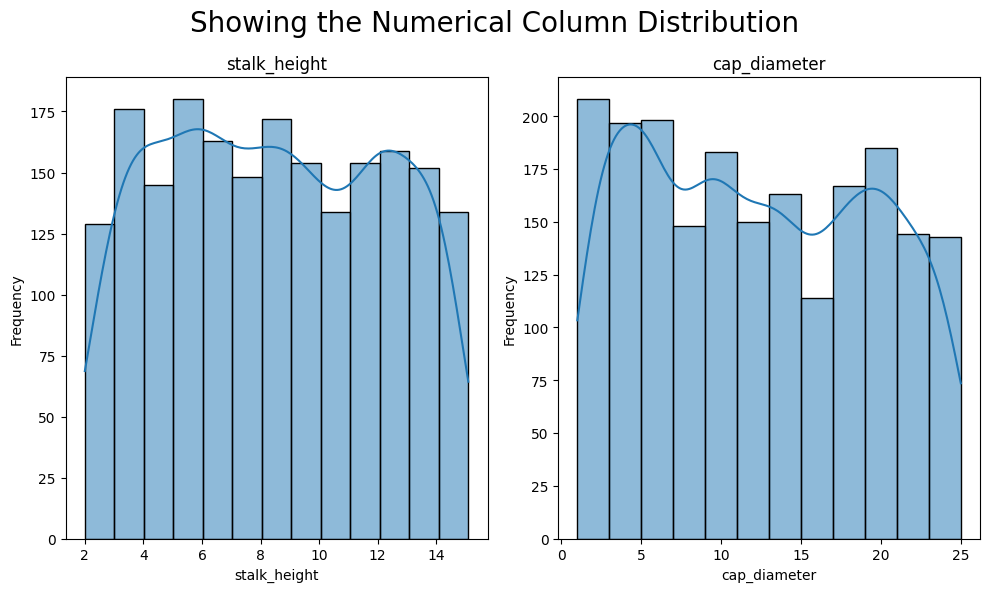

In [8]:
plt.figure(figsize=(10,6))
plt.suptitle('Showing the Numerical Column Distribution', fontsize=20)
for idx,i in enumerate(num_cols, 1):
    plt.subplot(1,2,idx)
    plt.title(f'{i}')
    sns.histplot(data=df, x=i, kde=True)
    plt.xlabel(f'{i}')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

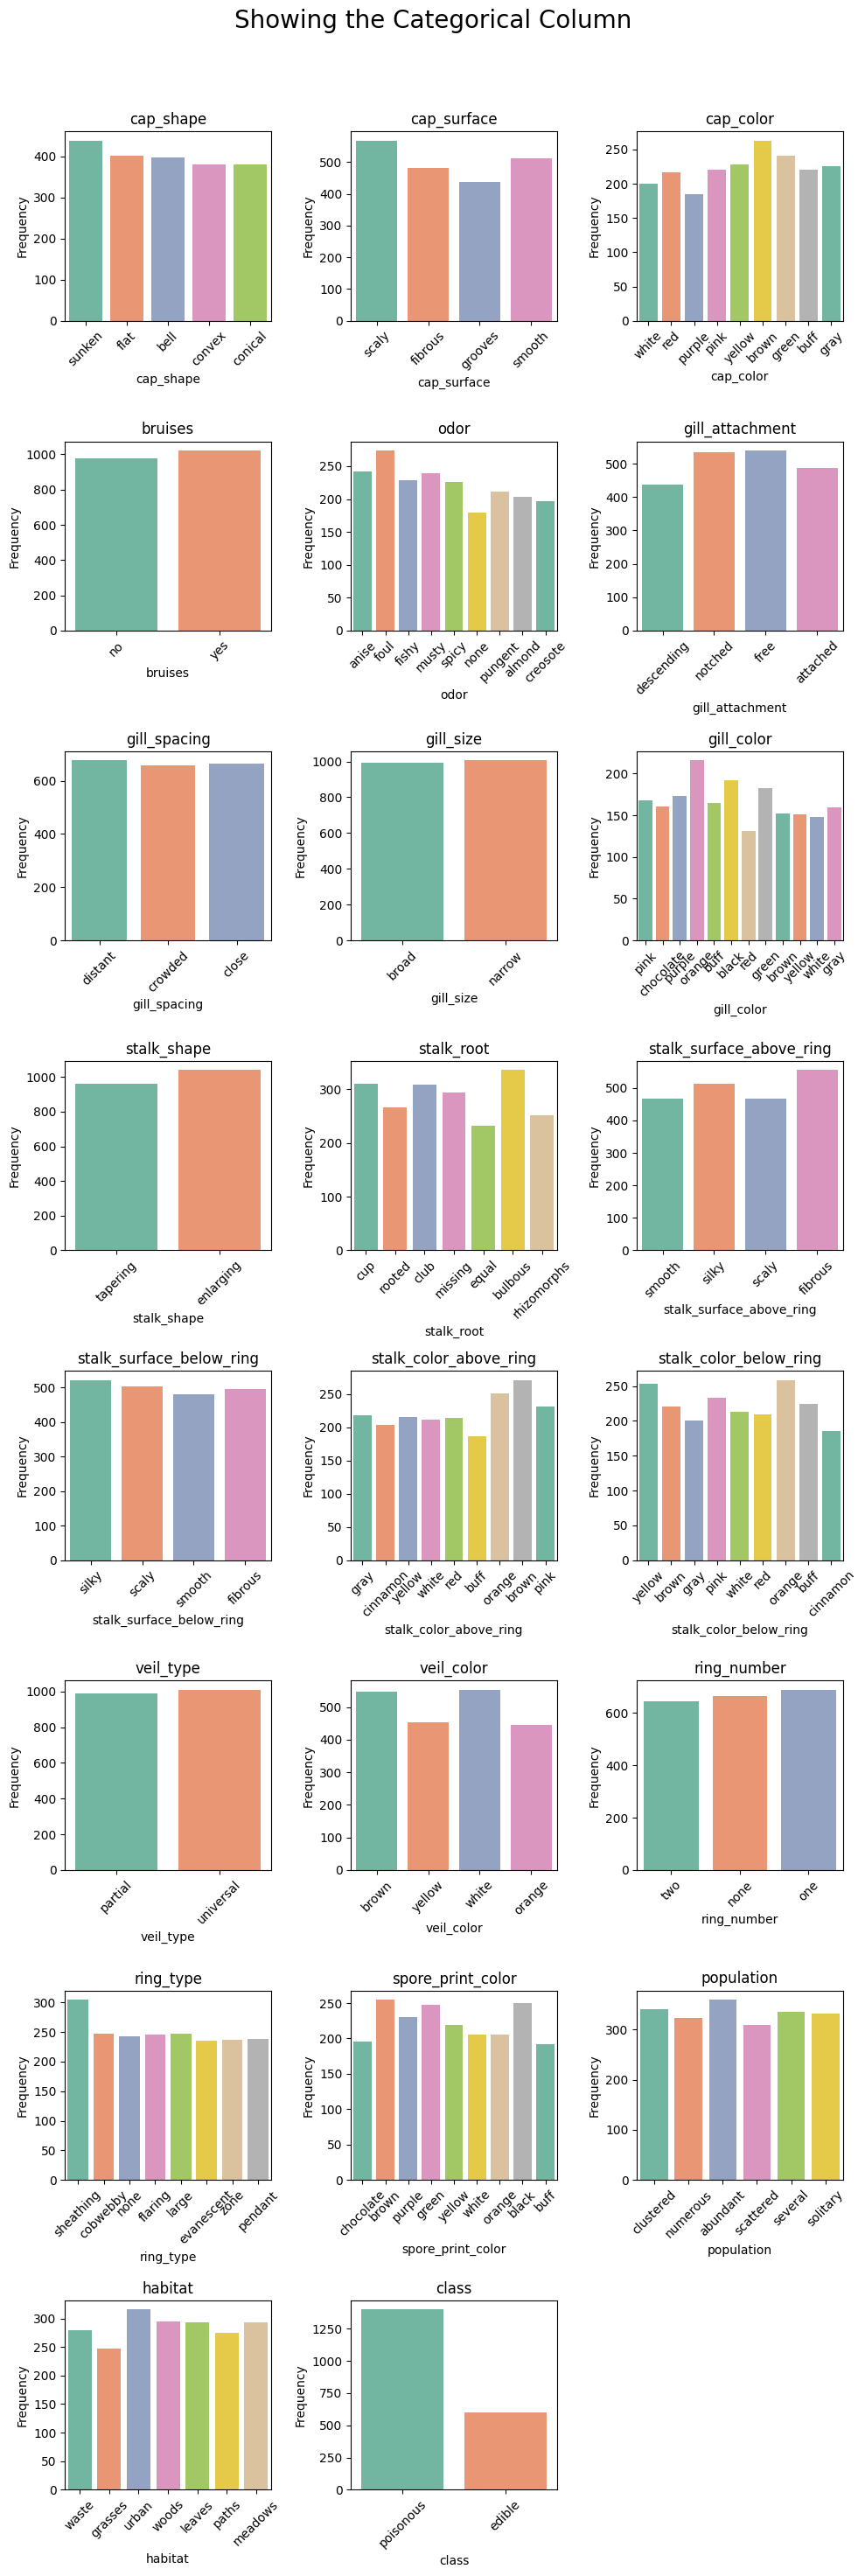

In [9]:
plt.figure(figsize=(10,30))
plt.suptitle('Showing the Categorical Column', fontsize=20)
for idx,i in enumerate(cat_cols, 1):
    plt.subplot(8,3,idx)
    plt.title(f'{i}')
    sns.countplot(data=df, x=i, palette='Set2')
    plt.xlabel(f'{i}')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

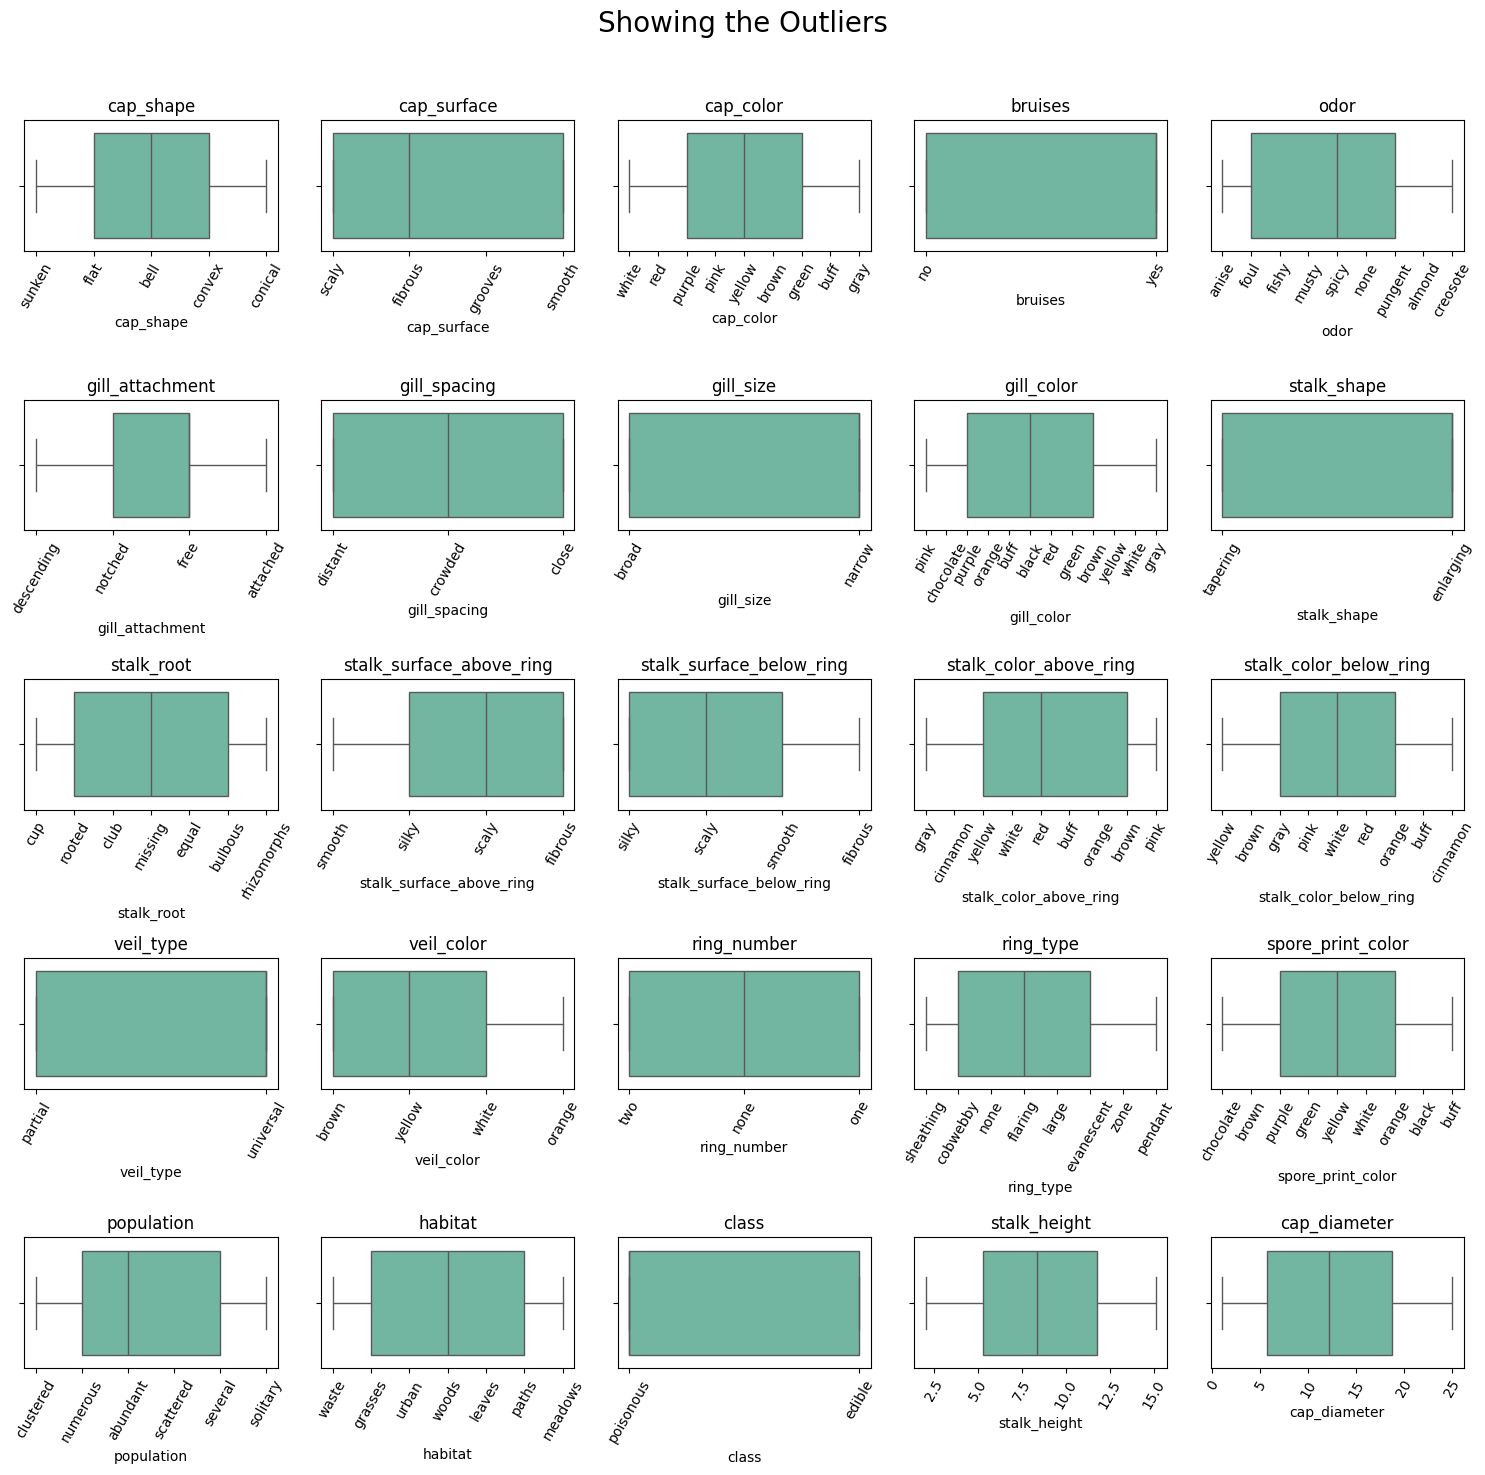

In [10]:
plt.figure(figsize=(15,15))
plt.suptitle('Showing the Outliers', fontsize=20)
for idx,i in enumerate(df.columns, 1):
    plt.subplot(5,5,idx)
    plt.title(f'{i}')
    sns.boxplot(data=df, x=i, palette='Set2')
    plt.xticks(rotation=60)
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

## <span style='color:#6A9C89'> Data Pre-Processing  </span>

In [11]:
x = df.drop(columns='class', axis=1)
y = df[['class']]

In [67]:
x.shape

(2000, 28)

In [13]:
## checking categorical variables
one_hot_cats = [x for x in cat_cols if x!='class' if df[x].value_counts().shape[0]<3]
label_cats = [x for x in cat_cols if df[x].value_counts().shape[0]>=3]

In [14]:
df[one_hot_cats].head(4)

,bruises,gill_size,stalk_shape,veil_type
0,no,broad,tapering,partial
1,no,narrow,enlarging,universal
2,yes,broad,tapering,universal
3,yes,broad,enlarging,partial


In [15]:
## applying one hot encoding
one_hot_cats_dummies = pd.get_dummies(df[one_hot_cats])
one_hot_cats_dummies.head()

,bruises_no,bruises_yes,gill_size_broad,gill_size_narrow,stalk_shape_enlarging,stalk_shape_tapering,veil_type_partial,veil_type_universal
0,1,0,1,0,0,1,1,0
1,1,0,0,1,1,0,0,1
2,0,1,1,0,0,1,0,1
3,0,1,1,0,1,0,1,0
4,0,1,0,1,1,0,0,1


In [16]:
one_hot_cats_dummies.shape

(2000, 8)

In [17]:
x = pd.concat([x, one_hot_cats_dummies], axis=1)
x.drop(columns=one_hot_cats, inplace=True)
x.head()

,cap_shape,cap_surface,cap_color,odor,gill_attachment,gill_spacing,gill_color,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter,bruises_no,bruises_yes,gill_size_broad,gill_size_narrow,stalk_shape_enlarging,stalk_shape_tapering,veil_type_partial,veil_type_universal
0,sunken,scaly,white,anise,descending,distant,pink,cup,smooth,silky,gray,yellow,brown,two,sheathing,chocolate,clustered,waste,14.276173,5.054983,1,0,1,0,0,1,1,0
1,sunken,fibrous,red,anise,notched,crowded,chocolate,rooted,silky,silky,cinnamon,brown,brown,two,sheathing,brown,numerous,waste,3.952715,19.068319,1,0,0,1,1,0,0,1
2,flat,grooves,purple,foul,descending,crowded,purple,cup,scaly,silky,yellow,gray,yellow,two,sheathing,purple,abundant,waste,9.054265,7.205884,0,1,1,0,0,1,0,1
3,bell,scaly,pink,fishy,notched,close,orange,club,smooth,scaly,yellow,pink,yellow,two,cobwebby,green,clustered,grasses,5.226499,20.932692,0,1,1,0,1,0,1,0
4,flat,smooth,yellow,musty,free,crowded,orange,missing,fibrous,scaly,gray,white,white,none,none,yellow,clustered,urban,14.037532,12.545245,0,1,0,1,1,0,0,1


In [18]:
x.shape

(2000, 28)

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in label_cats:
    x[i]=le.fit_transform(x[i])

In [20]:
x.head()

,cap_shape,cap_surface,cap_color,odor,gill_attachment,gill_spacing,gill_color,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat,stalk_height,cap_diameter,bruises_no,bruises_yes,gill_size_broad,gill_size_narrow,stalk_shape_enlarging,stalk_shape_tapering,veil_type_partial,veil_type_universal
0,4,2,7,1,1,2,7,2,3,2,3,8,0,2,6,3,1,5,14.276173,5.054983,1,0,1,0,0,1,1,0
1,4,0,6,1,3,1,3,6,2,2,2,0,0,2,6,1,2,5,3.952715,19.068319,1,0,0,1,1,0,0,1
2,3,1,5,4,1,1,8,2,1,2,8,3,3,2,6,6,0,5,9.054265,7.205884,0,1,1,0,0,1,0,1
3,0,2,4,3,3,0,6,1,3,1,8,5,3,2,0,4,1,0,5.226499,20.932692,0,1,1,0,1,0,1,0
4,3,3,8,5,2,1,6,4,0,1,3,7,2,0,4,8,1,4,14.037532,12.545245,0,1,0,1,1,0,0,1


In [21]:
x.shape

(2000, 28)

#### So, we have retain the same characteristics of the earlier dataset.

## <span style='color:#6A9C89'> Data Visualization  </span>

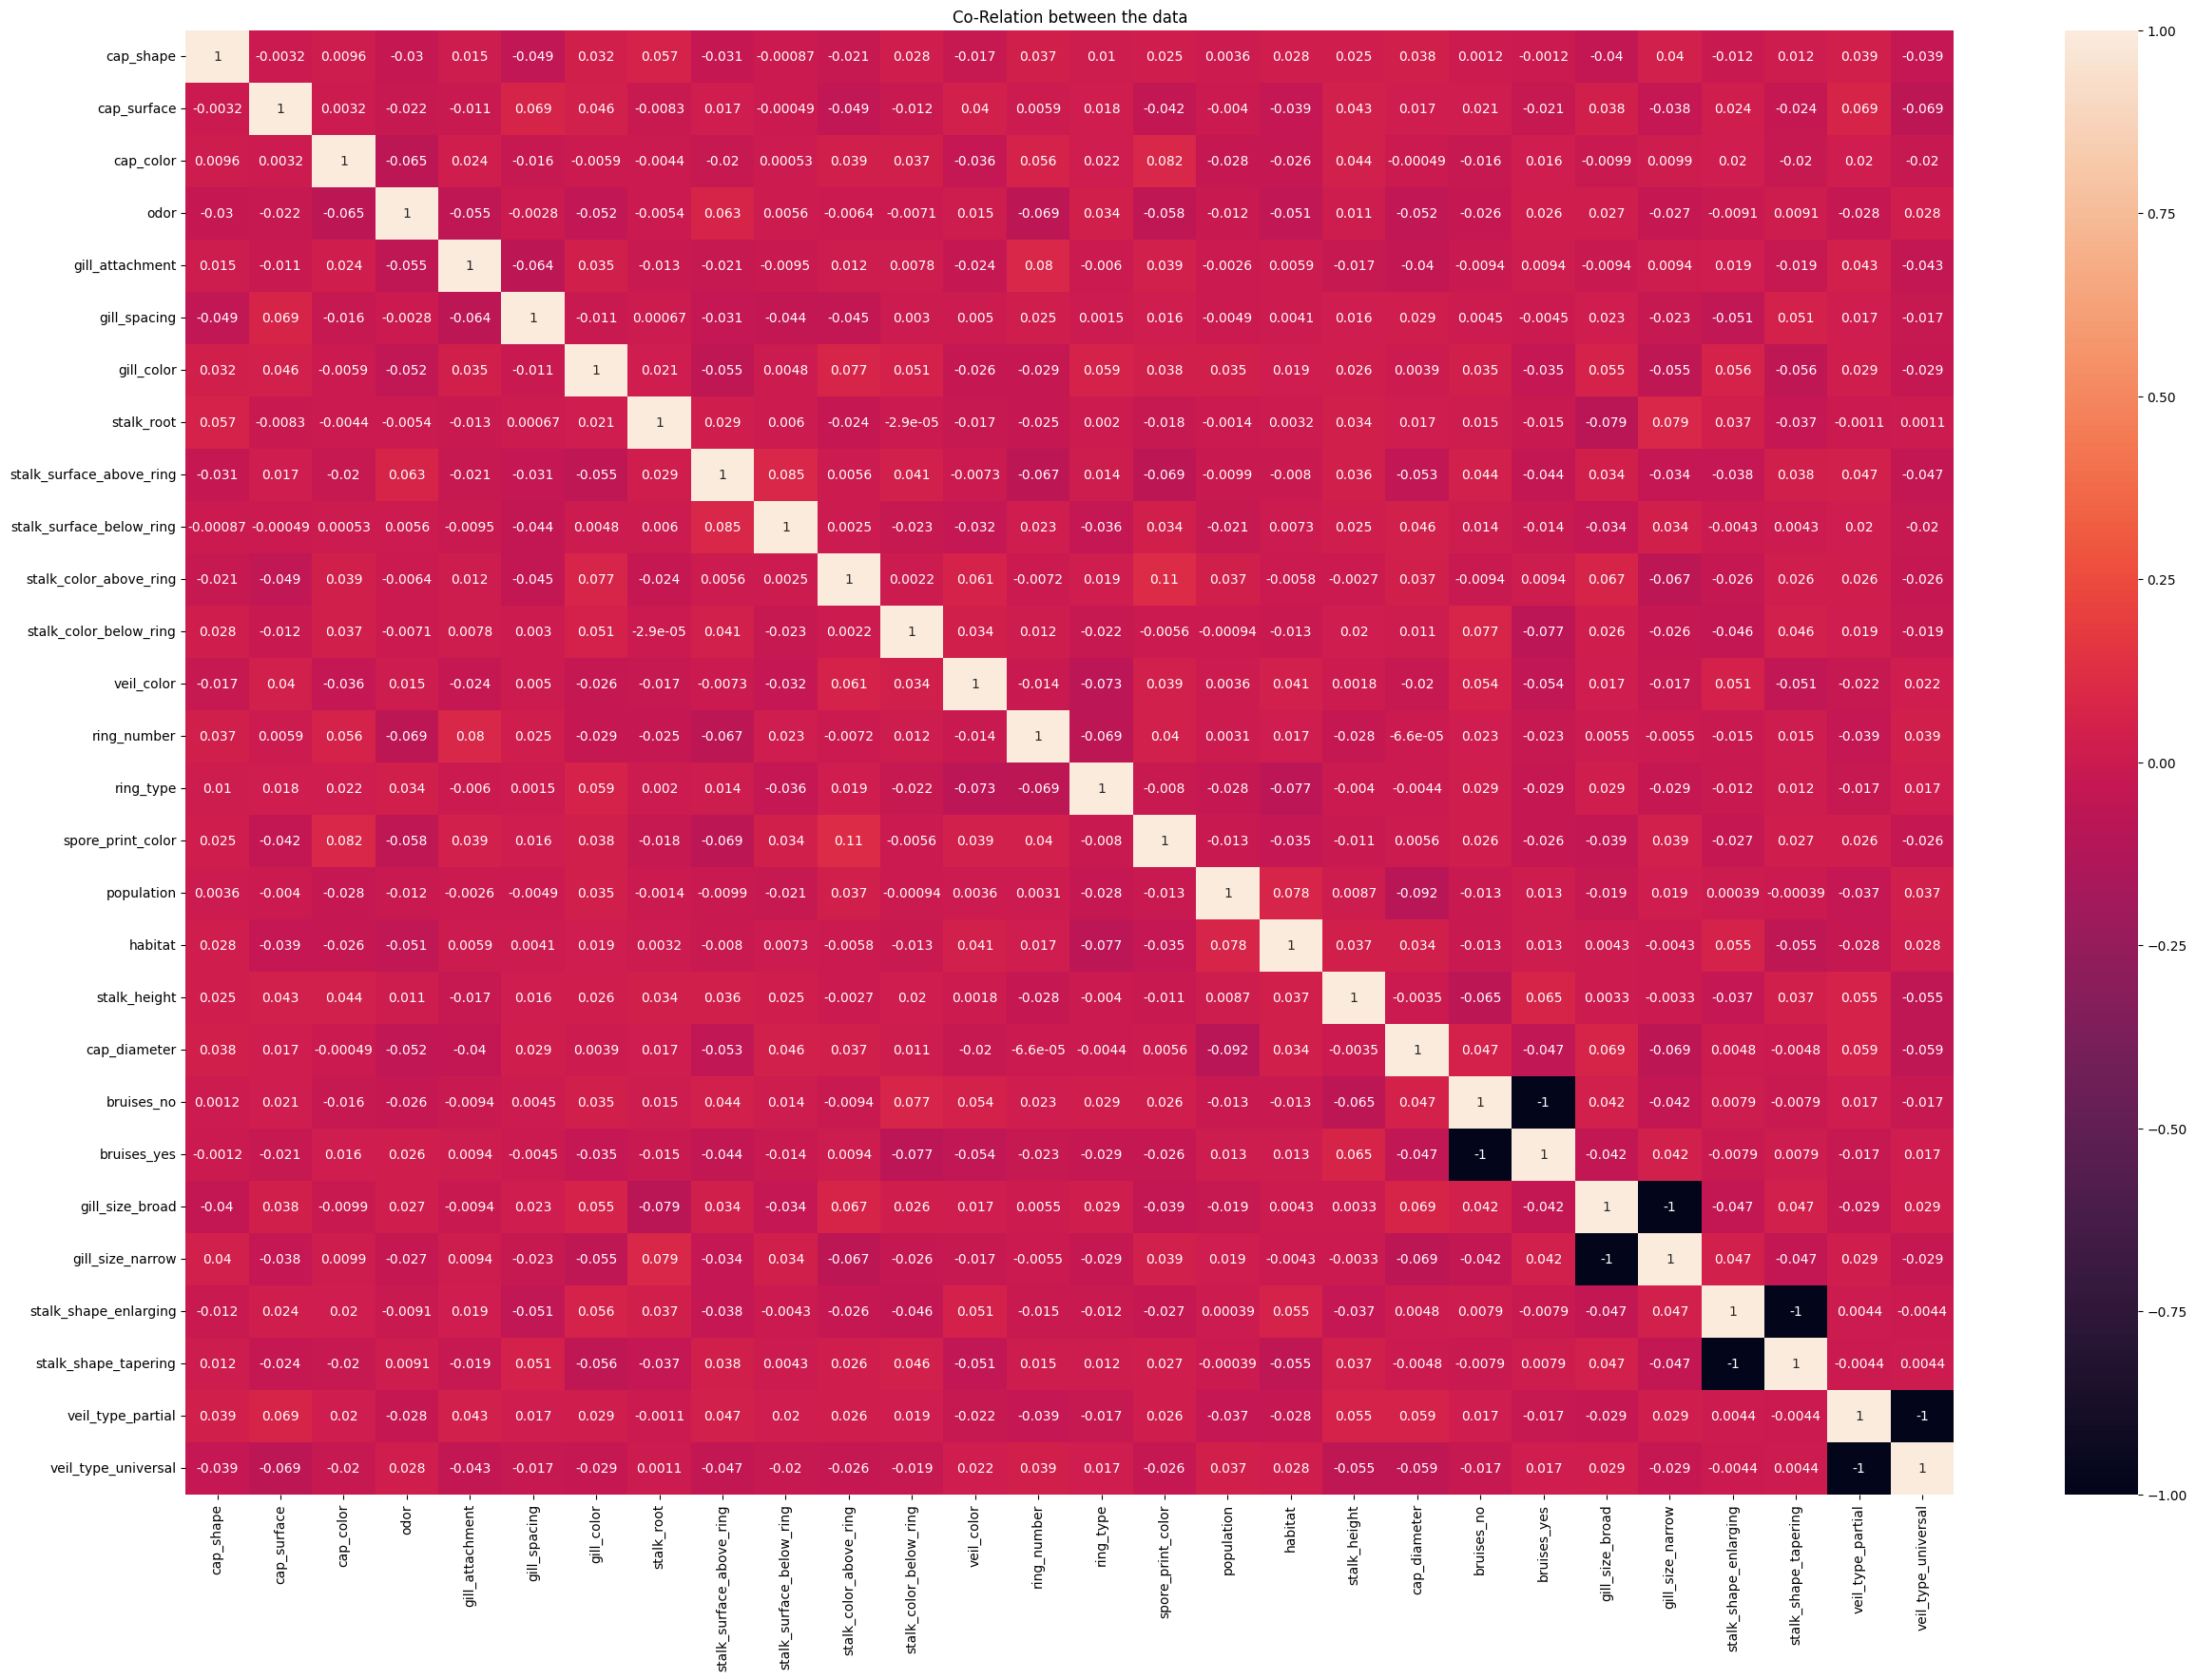

In [22]:
plt.figure(figsize=(30,20))
cor = x.corr()
sns.heatmap(data=cor, annot=True)
plt.title('Co-Relation between the data')
plt.show()

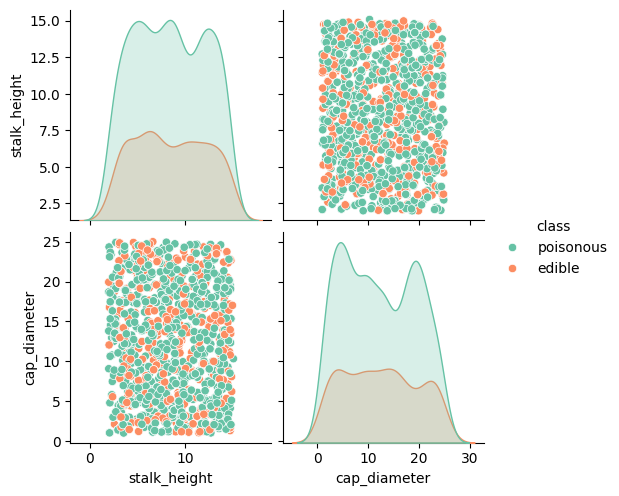

In [23]:
sns.pairplot(df, hue='class', palette='Set2')

## <span style='color:#6A9C89'> SVM (Support Vector Machine Implementation)  </span>

In [24]:
y.value_counts()

class    
poisonous    1400
edible        600
dtype: int64

In [25]:
class_data = {
    'Class' : ['Poisonous', 'Edible'],
    'Count' : [1400, 600]
}

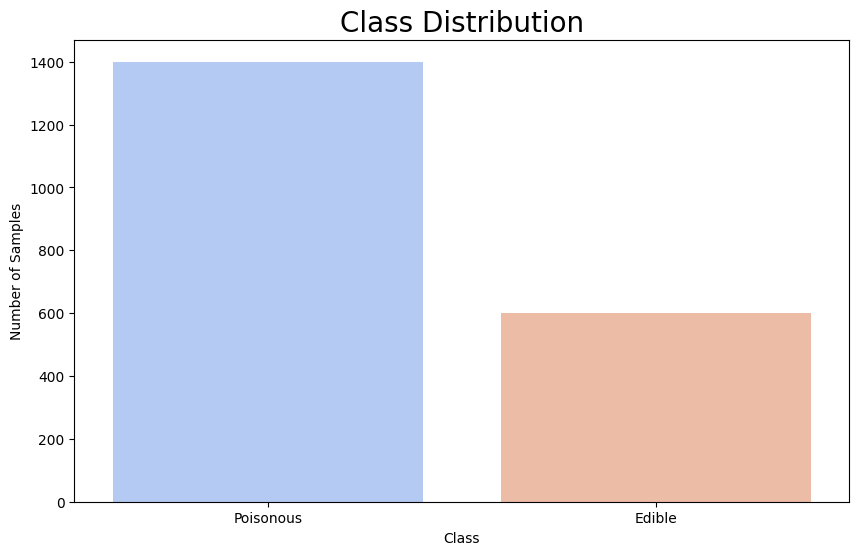

In [26]:
plt.figure(figsize=(10,6))
plt.title('Class Distribution', fontsize=20)
sns.barplot(x='Class', y='Count', data=class_data, palette='coolwarm')
plt.ylabel('Number of Samples')
plt.xlabel('Class')
plt.show()

##### We, can see that the data is imbalanced dataset

##### We can use SMOTE for resampling the data

In [27]:
## importing SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(x,y)

In [28]:
y_resampled.value_counts()

class    
edible       1400
poisonous    1400
dtype: int64

In [29]:
class_data_resampled = {
    'Class' : ['Poisonous', 'Edible'],
    'Count' : [1400, 1400]
}

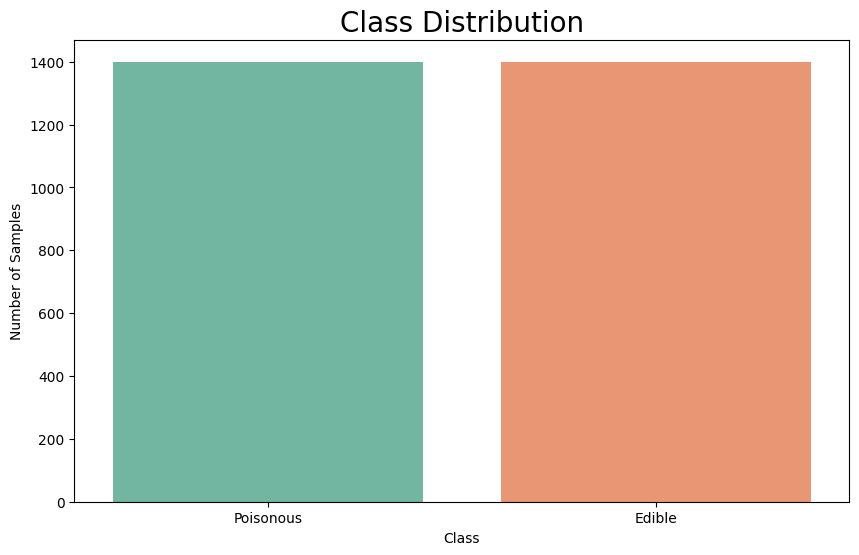

In [66]:
plt.figure(figsize=(10,6))
plt.title('Class Distribution', fontsize=20)
sns.barplot(x='Class', y='Count', data=class_data_resampled, palette='Set2')
plt.ylabel('Number of Samples')
plt.xlabel('Class')
plt.show()

##### so, now we have a balanced dataset

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2240, 28), (560, 28), (2240, 1), (560, 1))

In [32]:
## Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [33]:
## importing Support Vector Machine
from sklearn.svm import SVC
svc = SVC(probability=True)
params = {
    'C': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree' : [x for x in range(3, 10)],
    'gamma':['scale', 'auto'],
    'coef0' : [0.1, 0.3, 0.5, 0.7, 1.0]
}

In [34]:
## Cross Validation
from sklearn.model_selection import StratifiedKFold, cross_val_score
skv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [35]:
## Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
rcv = RandomizedSearchCV(estimator=svc, param_distributions=params, scoring='accuracy', cv=skv)

In [36]:
## fitting the Randomized Search CV
rcv.fit(x_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=SVC(probability=True),
                   param_distributions={'C': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
                                        'coef0': [0.1, 0.3, 0.5, 0.7, 1.0],
                                        'degree': [3, 4, 5, 6, 7, 8, 9],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   scoring='accuracy')

In [37]:
print(f'Best Score for the Model is {np.round(rcv.best_score_, 2)}')

Best Score for the Model is 0.91


In [38]:
print('Best Parameters for the model\n')
print(rcv.best_params_)

Best Parameters for the model

{'kernel': 'poly', 'gamma': 'auto', 'degree': 5, 'coef0': 0.5, 'C': 0.5}


In [39]:
best_model = rcv.best_estimator_

In [40]:
best_model

SVC(C=0.5, coef0=0.5, degree=5, gamma='auto', kernel='poly', probability=True)

In [41]:
## let's check the cross validation score for the model
validation_score = cross_val_score(estimator=rcv, X=x_train, y=y_train, scoring='accuracy', cv=skv)

In [42]:
mean_validation_score = validation_score.mean()
print(f'Average Cross Validation Score for the Fitted Model is {np.round(mean_validation_score,2)}')

Average Cross Validation Score for the Fitted Model is 0.89


In [43]:
y_pred = best_model.predict(x_test)

## <span style='color:#6A9C89'>  Model Evaluation  </span>

In [44]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, classification_report
print('Confusion Metrics')
print('='*100)
print(confusion_matrix(y_pred, y_test))
print('='*100)
print('='*100)
print('Classification Report')
print('='*100)
print(classification_report(y_pred, y_test))
print('='*100)

Confusion Metrics
[[262  16]
 [ 21 261]]
Classification Report
              precision    recall  f1-score   support

      edible       0.93      0.94      0.93       278
   poisonous       0.94      0.93      0.93       282

    accuracy                           0.93       560
   macro avg       0.93      0.93      0.93       560
weighted avg       0.93      0.93      0.93       560



In [45]:
accuracy = accuracy_score(y_pred, y_test)
print(f'Accuracy Score => {np.round(accuracy, 2)}')

Accuracy Score => 0.93


In [46]:
precision = precision_score(y_pred, y_test, average='weighted')
print(f'Precision Score => {np.round(precision, 2)}')

Precision Score => 0.93


In [47]:
f1 = f1_score(y_pred, y_test, average='micro')
print(f'F1 Score => {np.round(f1, 2)}')

F1 Score => 0.93


## <span style='color:#6A9C89'> Visualization of SVM Results  </span>

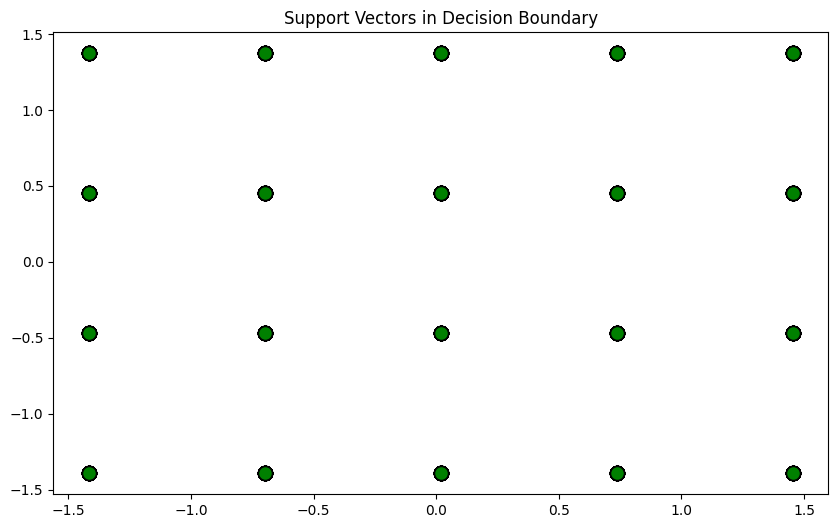

In [55]:
plt.figure(figsize=(10,6))
plt.title('Support Vectors in Decision Boundary')
plt.scatter(best_model.support_vectors_[:,0], best_model.support_vectors_[:,1],
           s=100, facecolors='green', edgecolors='k', label='Support Vectors')

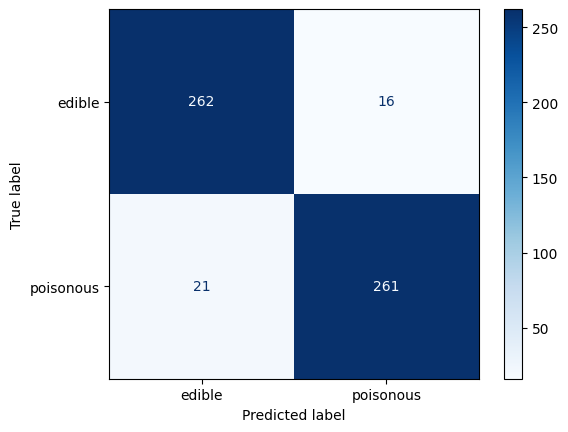

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_pred, y_test, cmap='Blues')

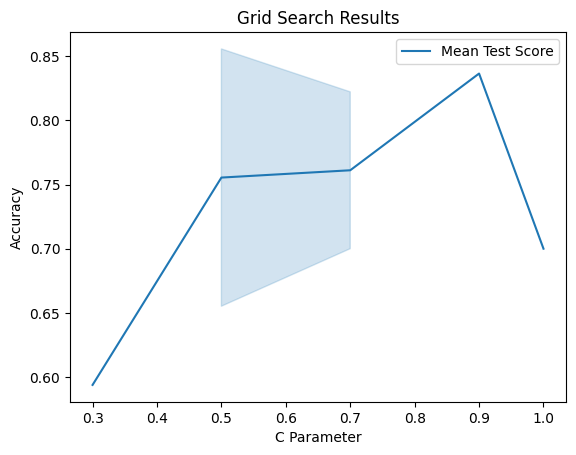

In [51]:
import pandas as pd
import seaborn as sns

# Assume grid_search is your GridSearchCV object
results = pd.DataFrame(rcv.cv_results_)
sns.lineplot(data=results, x='param_C', y='mean_test_score', label='Mean Test Score')
plt.xlabel('C Parameter')
plt.ylabel('Accuracy')
plt.title('Grid Search Results')
plt.legend()
plt.show()


## <span style='color:#6A9C89'> Parameter Tunning and Optimization  </span>

In [70]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [71]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
params = [
    ('Ridge Regression',
     Ridge(),
     {
        'alpha':[1.0, 0.2, 0.5, 0.7, 0.9],
        'max_iter': [x*100 for x in range(1,10,2)],
        'solver': ['auto', 'sag', 'saga', 'lbfgs']  
     }
    ),
    ('Lasso Regression',
    Lasso(),
     {
        'alpha':[1.0, 0.2, 0.5, 0.7, 0.9],
        'max_iter':[x*100 for x in range(1,10,2)],
        'selection':['cyclic', 'random']
     }
    ),
    ('Elastic Net Regression',
    ElasticNet(),
     {
        'alpha':[1.0, 0.2, 0.5, 0.7, 0.9],
        'l1_ratio': [x/10 for x in range(1,10,2)],
        'max_iter':[x*100 for x in range(1,10,2)],
        'selection':['cyclic', 'random'],
     }
    )
]

In [74]:
model_coef = {}
for name, model, param in params:
    random = RandomizedSearchCV(
        estimator=model,
        param_distributions=param,
        n_iter=100,
        verbose=2,
        cv=5,
        n_jobs=-1
    )
    random.fit(x_train, y_train)
    
    # Check if the estimator has coefficients
    if hasattr(random.best_estimator_, 'coef_'):
        model_coef[name] = random.best_estimator_.coef_
    else:
        model_coef[name] = "No coefficients available"

for mod in model_coef:
    print('\n')
    print('-' * 25 + f'{mod}' + '-' * 25 )
    print('\n')
    print(model_coef[mod])


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


-------------------------Ridge Regression-------------------------


[ 1.86177091e-02 -1.50161284e-02 -3.69860010e-02  3.07067617e-02
 -1.00801009e-02  4.22908916e-02 -6.11201891e-03  2.27205217e-02
  2.14251980e-02  8.06163455e-03 -2.77825445e-02  7.23611133e-04
  4.94300411e-03 -6.95485820e-05  7.33026905e-03  1.22864772e-02
  1.91664557e-02 -1.94317897e-02 -8.03662934e-03 -1.39956803e-02
  1.11808997e-01  1.03281071e-01  1.18858635e-01  1.24312268e-01
  1.32667355e-01  1.30790372e-01  8.92360567e-02  8.36930139e-02]


-------------------------Lasso Regression-------------------------


[ 0.  0. -0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0. -0.
 -0. -0.  0.  0.  0.  0.  0.  0.  0.  0.]


-------------------------Elastic Net Regression-------------------------


[ 0.00669194 -0.      

In [82]:
from sklearn.metrics import accuracy_score, precision_score, f1_score
def evaluate(actual, predicted):
    accuracy = accuracy_score(actual, predicted)
    precision = precision_score(actual, predicted, average='micro')
    f1 = f1_score(actual, predicted, average='micro')
    return [accuracy, precision, f1]

In [88]:
evaluate(y_pred, y_test)[0]

0.7142857142857143

## <span style='color:#6A9C89'> Comparison and Analysis </span>

In [95]:
## let's try different kernel type
scores_with_diff_kernels = {}
svc = SVC()
kernels = ['linear', 'poly', 'rbf', 'sigmoid' ]
## precomputed will not work on binary classification, due to square x values
for i in kernels:
    model = SVC(C=0.5, coef0=0.5, degree=5, gamma='auto', kernel=i, probability=True)
    model.fit(x_train, y_train)
    y_pred_try = model.predict(x_test)
    result = evaluate(y_pred_try, y_test)
    accuracy, precision, f1 = result
    scores_with_diff_kernels[i] = {
        'accuracy' : accuracy,
        'precision' : precision,
        'f1 score' : f1
    }
    print('='*50+f'For {i} Kernels'+'='*50)
    print(f'Accuracy = > {result[0]}')
    print(f'Precision = > {result[1]}')
    print(f'F1 = > {result[2]}')
    print('='*118)    

==================================================For linear Kernels==================================================
Accuracy = > 0.7142857142857143
Precision = > 0.7142857142857143
F1 = > 0.7142857142857143
==================================================For poly Kernels==================================================
Accuracy = > 0.9339285714285714
Precision = > 0.9339285714285714
F1 = > 0.9339285714285714
==================================================For rbf Kernels==================================================
Accuracy = > 0.8339285714285715
Precision = > 0.8339285714285715
F1 = > 0.8339285714285715
==================================================For sigmoid Kernels==================================================
Accuracy = > 0.5392857142857143
Precision = > 0.5392857142857143
F1 = > 0.5392857142857143


In [126]:
## change the result into a dataframe
scores_with_diff_kernels_df = pd.DataFrame(scores_with_diff_kernels)
scores_with_diff_kernels_df

,linear,poly,rbf,sigmoid
accuracy,0.714286,0.933929,0.833929,0.539286
precision,0.714286,0.933929,0.833929,0.539286
f1 score,0.714286,0.933929,0.833929,0.539286


In [127]:
scores_with_diff_kernels_df=scores_with_diff_kernels_df.reset_index()
scores_with_diff_kernels_df

,index,linear,poly,rbf,sigmoid
0,accuracy,0.714286,0.933929,0.833929,0.539286
1,precision,0.714286,0.933929,0.833929,0.539286
2,f1 score,0.714286,0.933929,0.833929,0.539286


In [128]:
scores_with_diff_kernels_df=scores_with_diff_kernels_df.set_index('index')
scores_with_diff_kernels_df

,linear,poly,rbf,sigmoid
index,,,,
accuracy,0.714286,0.933929,0.833929,0.539286
precision,0.714286,0.933929,0.833929,0.539286
f1 score,0.714286,0.933929,0.833929,0.539286


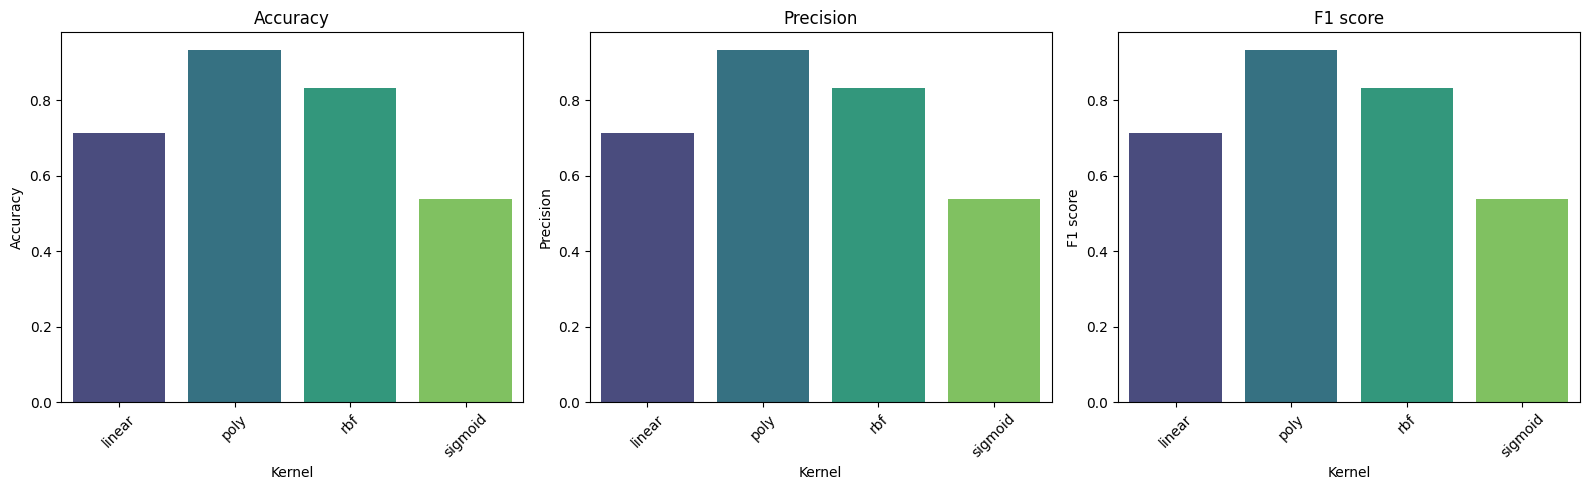

In [137]:
scores_with_diff_kernels_df = scores_with_diff_kernels_df.T
scores_with_diff_kernels_df.columns = ["accuracy", "precision", "f1 score"]

# Plot the metrics for each kernel
plt.figure(figsize=(16, 5))
for idx, metric in enumerate(scores_with_diff_kernels_df.columns, 1):
    plt.subplot(1, 3, idx)  # 1 row, 3 columns, subplot idx
    sns.barplot(
        x=scores_with_diff_kernels_df.index,
        y=scores_with_diff_kernels_df[metric],
        palette="viridis",
    )
    plt.title(metric.capitalize())
    plt.xlabel("Kernel")
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Discuss practical implications of SVM in real-world classification tasks.
    SVMs are highly effective for real-world classification tasks, especially for high-dimensional, non-linear, and imbalanced datasets. However, challenges like scalability and interpretability should be carefully considered when applying SVMs to large or explainability-sensitive problems.